In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from moscot.problems.label_transfer import LabelProblem

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'dataset.parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [13]:
dir(moscot.problems.label_transfer)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [3]:
adata_2019 = sc.read("/storage/groups/ml01/workspace/dominik.klein/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [4]:
adata_2022 = sc.read("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [5]:
adata_2022.obs["sample"]

AAACAGCCAACAGCCT-1-0    E14.5
AAACAGCCAACCCTCC-1-0    E14.5
AAACAGCCACCTGTAA-1-0    E14.5
AAACAGCCACTAAGCC-1-0    E14.5
AAACAGCCAGGATAAC-1-0    E14.5
                        ...  
TTTGTGTTCTTGTTCG-1-1    E15.5
TTTGTTGGTATTGAGT-1-1    E15.5
TTTGTTGGTCCTAAGA-1-1    E15.5
TTTGTTGGTTAACAGT-1-1    E15.5
TTTGTTGGTTGTTGCT-1-1    E15.5
Name: sample, Length: 16978, dtype: category
Categories (2, object): ['E14.5', 'E15.5']

In [6]:
adata_2022.obs["day"] = adata_2022.obs.apply(lambda x: "14.5" if x["sample"]=="E14.5" else "15.5", axis=1)

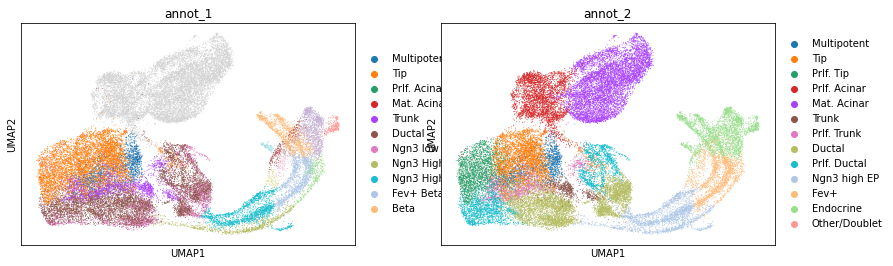

In [7]:
adata_2019.obs["annot_1"] = adata_2019.obs["clusters_fig6_alpha_final"].copy()
adata_2019.obs["annot_2"] = adata_2019.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_2019, color=["annot_1", "annot_2"])

In [8]:
adata_2019.obs["celltype"] = np.where(~pd.isnull(adata_2019.obs["annot_1"]), adata_2019.obs["annot_1"], adata_2019.obs["annot_2"])

In [9]:
pd.isnull(adata_2019.obs["celltype"]).sum()

0

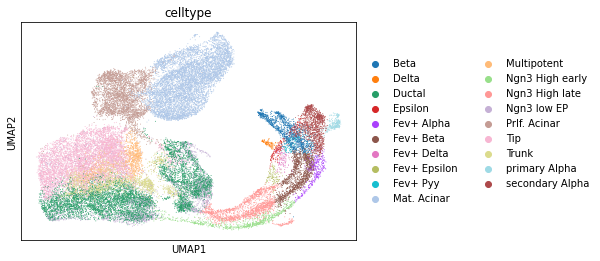

In [11]:
sc.pl.umap(adata_2019, color=["celltype"])

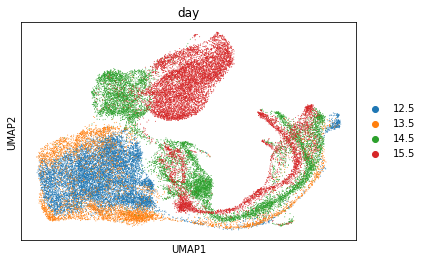

In [12]:
sc.pl.umap(adata_2019, color=["day"])

In [10]:
adata = adata_2019.concatenate(adata_2022, join="outer")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [21]:
# we see that 2019 dataset corresponds to adata.obs["batch"]=0
adata.obs[["batch", "day"]]

,batch,day
AAACCTGAGCACCGCT-1-0-0,0,12.5
AAACCTGAGCGCTTAT-1-0-0,0,12.5
AAACCTGAGGGAAACA-1-0-0,0,12.5
AAACCTGAGGTACTCT-1-0-0,0,12.5
AAACCTGAGTCACGCC-1-0-0,0,12.5
...,...,...
TTTGTGTTCTTGTTCG-1-1-1,1,15.5
TTTGTTGGTATTGAGT-1-1-1,1,15.5
TTTGTTGGTCCTAAGA-1-1-1,1,15.5
TTTGTTGGTTAACAGT-1-1-1,1,15.5


In [11]:
adata_0 = adata[adata.obs["day"]=="14.5"].copy()

In [25]:
adata_0.obs["batch"].value_counts()

0    20519
1    16978
Name: batch, dtype: int64

In [13]:
lp = LabelProblem(adata_0)
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1")

In [14]:
lp.solve(epsilon=1e-2)

2022-06-16 11:47:09.941138: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-06-16 11:47:12.711878: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-06-16 11:47:15.413870: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

RuntimeError: INTERNAL: Failed to complete all kernels launched on stream 0x56386d4c0b40: stream did not block host until done; was already in an error state

In [ ]:
lp.transition_matrix()

In [20]:
lp["0","1"].xy

TaggedArray(data=ArrayView([[-1.5846839e+01,  1.6419947e+01, -3.7222202e+00, ...,
            -3.6876142e-01, -1.7612921e+00, -4.7590682e-01],
           [ 5.2461061e+00, -1.7103988e+00, -4.3923063e+00, ...,
            -6.0847712e-01,  2.3173751e-02,  3.0331147e-01],
           [ 2.9092934e+00, -5.1379943e+00, -6.2490997e+00, ...,
             4.4891235e-01,  4.9132878e-01, -6.3284099e-01],
           ...,
           [-1.3741376e+01,  5.6421213e+00,  6.0469379e+00, ...,
             3.0769880e-03,  8.7627685e-01, -7.9765178e-02],
           [ 5.2445741e+00, -1.4851642e+00, -4.3582029e+00, ...,
             1.6951267e+00, -1.4134488e+00, -4.0920642e-01],
           [ 6.0829239e+00, -1.9774972e+00, -7.1921964e+00, ...,
            -1.9225575e-02, -3.4595546e-01, -3.1803909e-01]],
          dtype=float32), data_y=ArrayView([[10.202112  ,  8.192511  , -0.74083644, ..., -0.57795423,
             1.6354231 , -1.1983956 ],
           [10.454915  ,  1.9736089 ,  0.83314186, ...,  1.3844559 ,
